<a href="https://colab.research.google.com/github/bishnumurmu/human-or-not/blob/master/horses_or_humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This downloads the humans and horses dataset

In [72]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-04-09 06:31:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   207MB/s    in 0.7s    

2019-04-09 06:31:36 (207 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [73]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-04-09 06:31:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2019-04-09 06:31:40 (98.9 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



The following python code will use the OS library to use Operating System libraries, gives access to the file system, and the zipfile library allows to unzip the data.

In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [0]:
# Directory for training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory for training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [0]:
# Directory for validation horse pictures
val_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory for validation human pictures
val_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Now, let's see what the filenames look like in the horses and humans training directories:

In [78]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:5])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:5])

['horse26-2.png', 'horse20-0.png', 'horse01-5.png', 'horse42-2.png', 'horse37-5.png']
['human14-28.png', 'human13-26.png', 'human11-04.png', 'human02-10.png', 'human05-03.png']


In [79]:
val_horse_names = os.listdir(val_horse_dir)
print(val_horse_names[:5])

val_human_names = os.listdir(val_human_dir)
print(val_human_names[:5])

['horse26-2.png', 'horse3-469.png', 'horse5-360.png', 'horse20-0.png', 'horse01-5.png']
['human14-28.png', 'human13-26.png', 'human11-04.png', 'human02-10.png', 'human05-03.png']


Let's find out the total number of horse and human images in the directories:

In [80]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [81]:
print('total validation horse images:', len(os.listdir(val_horse_dir)))
print('total validation human images:', len(os.listdir(val_human_dir)))

total validation horse images: 628
total validation human images: 655


Let's take a look at few pictures :-

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# we'll output images in a 5x5 configuration
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

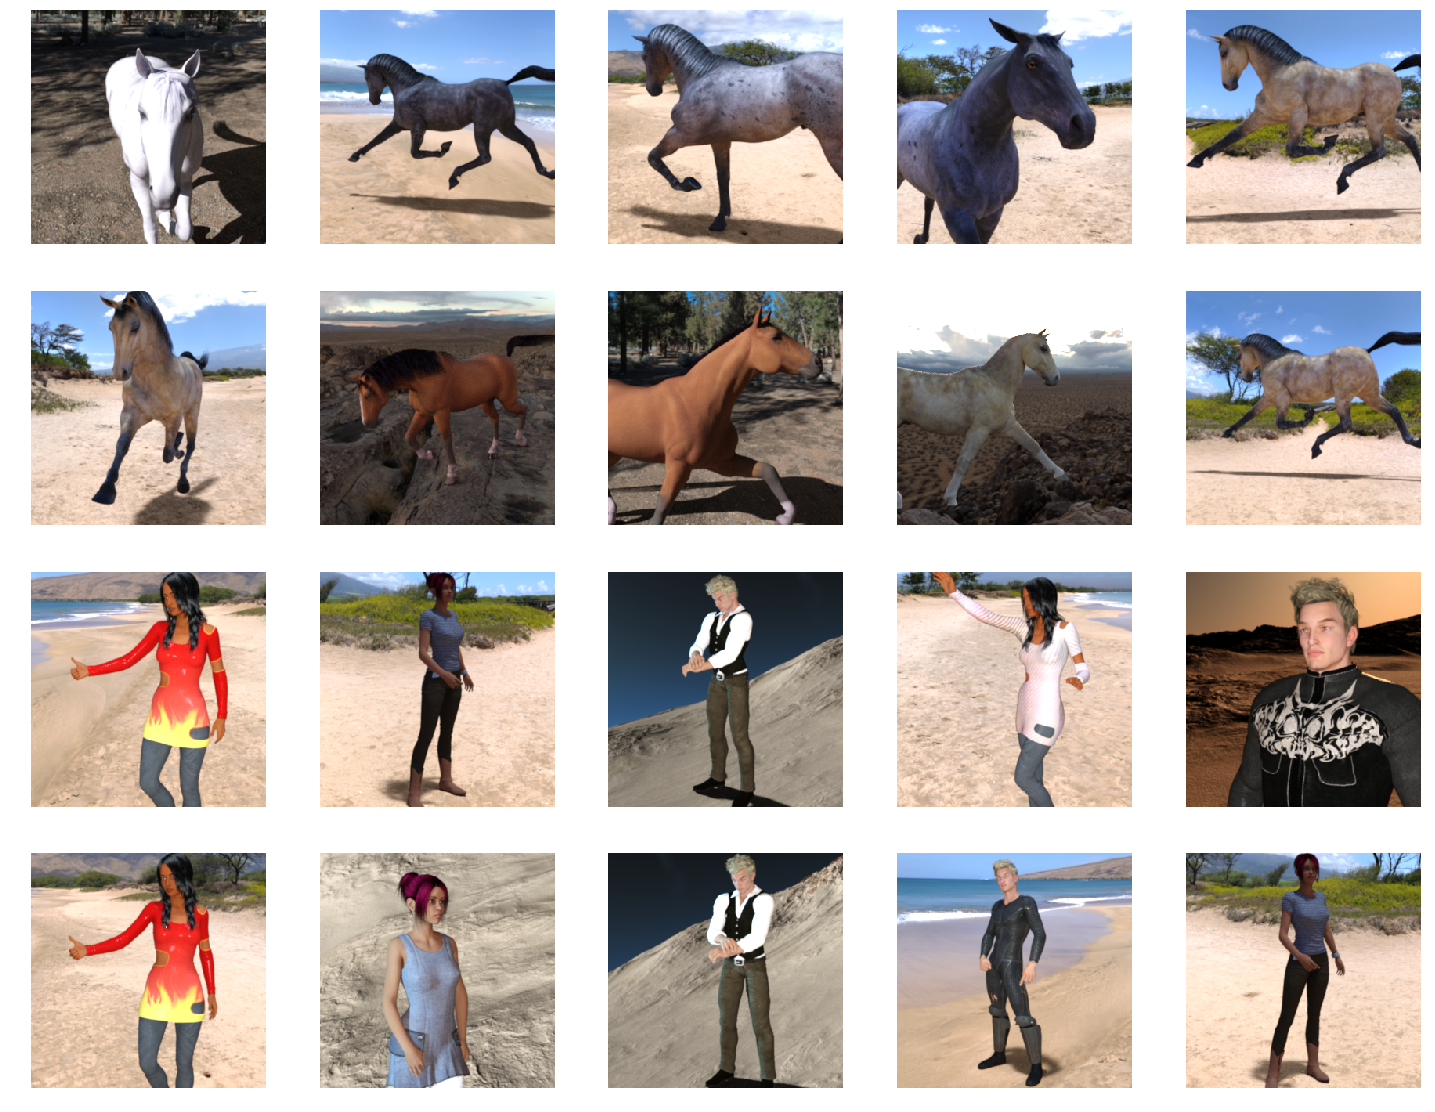

In [85]:
# Set up matplotlib fig, and size it to fit 5x5 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 10
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-10:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-10:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Now let's make a neural network model :-

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
    # Input shape is the desired size of the image 256x256 with 3 bytes color
    # This is the 1st convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # Dense neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron.
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Let's see the summary of the model

In [94]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 64)        36928     
__________

Using keras optimizers :- 

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Some preprocessing Image data generator

In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(256, 256),  # All images will be resized to 150x150
        batch_size=128,
        # As we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [97]:
val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size=(256, 256),
        batch_size=128,
        class_mode='binary')

Found 1283 images belonging to 2 classes.


Training the images

In [98]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,validation_data = val_generator,  
      epochs=10,
      verbose=1)

Epoch 1/10
9/9 [==============================] - 141s 16s/step - loss: 1.2211 - acc: 0.4995 - val_loss: 0.6845 - val_acc: 0.8839
Epoch 2/10
9/9 [==============================] - 137s 15s/step - loss: 0.7570 - acc: 0.6738 - val_loss: 0.6785 - val_acc: 0.6820
Epoch 3/10
9/9 [==============================] - 137s 15s/step - loss: 0.6611 - acc: 0.6290 - val_loss: 0.6357 - val_acc: 0.5300
Epoch 4/10
9/9 [==============================] - 136s 15s/step - loss: 0.6567 - acc: 0.7196 - val_loss: 0.9380 - val_acc: 0.8465
Epoch 5/10
9/9 [==============================] - 137s 15s/step - loss: 0.4840 - acc: 0.8062 - val_loss: 0.3710 - val_acc: 0.9252
Epoch 6/10
9/9 [==============================] - 137s 15s/step - loss: 0.3190 - acc: 0.8802 - val_loss: 0.2777 - val_acc: 0.9244
Epoch 7/10
9/9 [==============================] - 138s 15s/step - loss: 0.1792 - acc: 0.9455 - val_loss: 4.6464 - val_acc: 0.5043
Epoch 8/10
9/9 [==============================] - 137s 15s/step - loss: 0.7373 - acc: 0.86

Saving 2016-12-05-geoffrey-hinton.jpg to 2016-12-05-geoffrey-hinton (1).jpg
[1.]
2016-12-05-geoffrey-hinton.jpg is a human


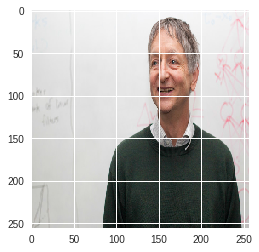

In [99]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(256, 256))
  plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is not human")
 